In [1]:
from google.colab import drive 
drive.mount('/content/drive',force_remount=True)
import os
# This path will change on your drive
# Add shortcut of folder 'IEOR 235' to your drive and copy the path of folder 'MVP!!!' 
# (use 'Files' button on the left)
noteboook_path = '/content/drive/MyDrive/281A' # GQ
os.chdir(noteboook_path)

Mounted at /content/drive


In [2]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import zipfile  
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.tree.export import export_graphviz
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split


In [6]:
df = pd.read_pickle('SFO_PCA_temp.pkl')
y = df['Delay']
X = df[df.columns[:-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
def precallacc(y_pre, y_test):
  print('precision:', precision_score(y_pred= y_pre, y_true=y_test)) #猜对猜对率
  print('recall:', recall_score(y_pred= y_pre, y_true=y_test)) #对的猜对率
  print('accracy:', accuracy_score(y_pred= y_pre, y_true=y_test))
  return

# Decision Tree (default)
precision: 0.37425269031486647  

recall: 0.3914130887869946  

accracy: 0.7429807447620663


In [8]:
#2a
tree = DecisionTreeClassifier(random_state=0) 
tree.fit(X_train, y_train)
y_pre = tree.predict(X_test)
precallacc(y_pre, y_test)

precision: 0.36873990306946686
recall: 0.38670055061414654
accracy: 0.744592416659598


## Decision Tree (4,10)

precision: 0.566453447050462  

recall: 0.3379983036471586  

accracy: 0.8158452794978369  

In [10]:
max_d = []
min_sl = []
train_score, test_score = [], []
for i in [1,2,3,4,5,6,7]:
    for j in [1,2,3,4,6,8,10,12]:
        tree = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j)
        tree.fit(X_train, y_train)
        y_pre = tree.predict(X_test)
        y_pre_t = tree.predict(X_train)
        test_score.append(recall_score(y_pred= y_pre, y_true=y_test))
        train_score.append(recall_score(y_pred= y_pre_t, y_true=y_train))
        max_d.append(i)
        min_sl.append(j)

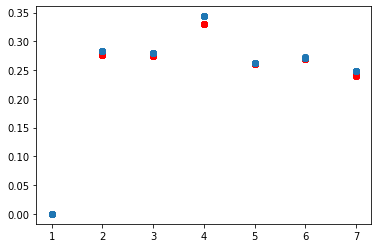

In [11]:
plt.scatter(max_d,test_score,c = 'r')
plt.scatter(max_d,train_score)
plt.show()

In [12]:
max_d = []
min_sl = []
train_score, test_score = [], []
i = 4
for j in [1,2,3,4,6,8,10,12]:
    tree = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j)
    tree.fit(X_train, y_train)
    y_pre = tree.predict(X_test)
    y_pre_t = tree.predict(X_train)
    test_score.append(recall_score(y_pred= y_pre, y_true=y_test))
    train_score.append(recall_score(y_pred= y_pre_t, y_true=y_train))
    max_d.append(i)
    min_sl.append(j)

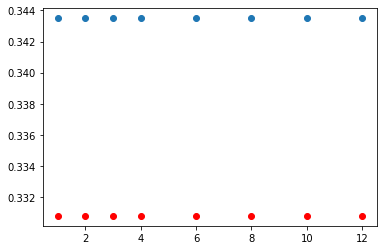

In [13]:
plt.scatter(min_sl,test_score,c='r')
plt.scatter(min_sl,train_score)
plt.show()

In [19]:
tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)
tree.fit(X_train, y_train)
y_pre = tree.predict(X_test)
precallacc(y_pre, y_test)
tree.score(X_test, y_test)

precision: 0.5630857966834896
recall: 0.33079203727234224
accracy: 0.8145729069471541


0.8145729069471541

## Random Forest(BAD,22,1)
precision: 0.5474642392717816

recall: 0.3566285472257518

accracy: 0.8121129866825006

In [20]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pre = clf.predict(X_test)
precallacc(y_pre, y_test)

precision: 0.5236294896030246
recall: 0.3519695044472681
accracy: 0.8060904232759352


In [34]:
train_score=[]
test_score=[]
max_d=[]
min_sl=[]
for i in [5,10,15,20,25,30,35,40,50,60]:
    for j in [5]:
        tree = RandomForestClassifier(max_depth=i, min_samples_leaf=j)
        tree.fit(X_train, y_train)
        y_pre = tree.predict(X_test)
        y_pre_t = tree.predict(X_train)
        test_score.append(recall_score(y_pred= y_pre, y_true=y_test))
        train_score.append(recall_score(y_pred= y_pre_t, y_true=y_train))
        max_d.append(i)
        min_sl.append(j)

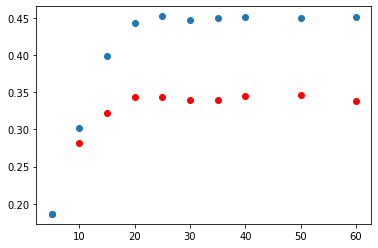

In [35]:
plt.scatter(max_d,test_score,c = 'r')
plt.scatter(max_d,train_score)
plt.show()

In [36]:
train_score=[]
test_score=[]
max_d=[]
min_sl=[]
for i in [21,22,23,24,25,26,27,28]:
    for j in [5]:
        tree = RandomForestClassifier(max_depth=i, min_samples_leaf=j)
        tree.fit(X_train, y_train)
        y_pre = tree.predict(X_test)
        y_pre_t = tree.predict(X_train)
        test_score.append(recall_score(y_pred= y_pre, y_true=y_test))
        train_score.append(recall_score(y_pred= y_pre_t, y_true=y_train))
        max_d.append(i)
        min_sl.append(j)

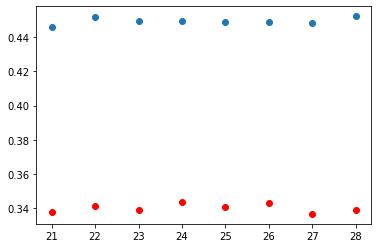

In [37]:
plt.scatter(max_d,test_score,c = 'r')
plt.scatter(max_d,train_score)
plt.show()

In [40]:
train_score=[]
test_score=[]
max_d=[]
min_sl=[]
for i in [22]:
    for j in [1,2,3,4,5,6,7,8,9,10,15,20,25,30]:
        tree = RandomForestClassifier(max_depth=i, min_samples_leaf=j)
        tree.fit(X_train, y_train)
        y_pre = tree.predict(X_test)
        y_pre_t = tree.predict(X_train)
        test_score.append(recall_score(y_pred= y_pre, y_true=y_test))
        train_score.append(recall_score(y_pred= y_pre_t, y_true=y_train))
        max_d.append(i)
        min_sl.append(j)

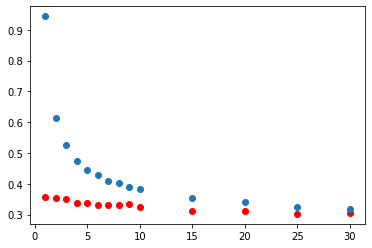

In [41]:
plt.scatter(min_sl,test_score,c='r')
plt.scatter(min_sl,train_score)
plt.show()

In [43]:
tree = RandomForestClassifier(max_depth=22, min_samples_leaf=1)
tree.fit(X_train, y_train)
y_pre = tree.predict(X_test)
precallacc(y_pre, y_test)
tree.score(X_test, y_test)

precision: 0.5474642392717816
recall: 0.3566285472257518
accracy: 0.8121129866825006


0.8121129866825006

##Bagging(BAD)

In [51]:
tree=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf=10)
bag=BaggingClassifier(base_estimator=tree,random_state=0)

bag=bag.fit(X_train,y_train)
y_pre = bag.predict(X_test)
precallacc(y_pre, y_test)

precision: 0.577386468952734
recall: 0.26387124099957643
accracy: 0.8138943082534567


In [47]:
train_score=[]
test_score=[]
n_es=[]

tree=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf=10)
for i in [1,2,3,4,5,6,7,8,9,10,15,20]:
    bag=BaggingClassifier(base_estimator=tree,n_estimators=i)
    bag.fit(X_train, y_train)
    y_pre = bag.predict(X_test)
    y_pre_t = bag.predict(X_train)
    test_score.append(recall_score(y_pred= y_pre, y_true=y_test))
    train_score.append(recall_score(y_pred= y_pre_t, y_true=y_train))
    n_es.append(i)

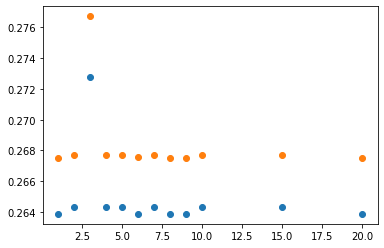

In [48]:
plt.scatter(n_es,test_score)
plt.scatter(n_es,train_score)
plt.show()